### Import Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

### Load Dataset

In [2]:
path = "D:\All_Projects\Prayatna\Design of Datasets\Anomaly_Detection_50000.csv"
df = pd.read_csv(path)

print("Shape:", df.shape)
df.head()

Shape: (50000, 11)


,aadhaar_like_id,household_id,annual_income,scheme_enrolled,district,bank_account,phone_number,registrations_per_aadhaar,bank_shared_count,phone_shared_count,fraud_label
0,104332181960,HH54597,84901,MGNREGA,District_10,BA01338908,7863794026,1,1,1,0
1,351161559407,HH69429,65852,MGNREGA,District_11,BA81618495,7103413164,1,1,1,0
2,553419283276,HH28726,89430,MGNREGA,District_9,BA48350305,9413953767,1,7,1,1
3,388496965328,HH99353,115690,Food-Ration,District_49,BA71012269,6669784801,1,1,1,0
4,451462704828,HH41571,62975,Food-Ration,District_6,BA14893252,6957015430,1,1,1,0


### Basic dataset checks

In [3]:
print("\nColumn names:")
print(df.columns)

print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)


Column names:
Index(['aadhaar_like_id', 'household_id', 'annual_income', 'scheme_enrolled',
       'district', 'bank_account', 'phone_number', 'registrations_per_aadhaar',
       'bank_shared_count', 'phone_shared_count', 'fraud_label'],
      dtype='object')

Missing values:
aadhaar_like_id              0
household_id                 0
annual_income                0
scheme_enrolled              0
district                     0
bank_account                 0
phone_number                 0
registrations_per_aadhaar    0
bank_shared_count            0
phone_shared_count           0
fraud_label                  0
dtype: int64

Data types:
aadhaar_like_id               int64
household_id                 object
annual_income                 int64
scheme_enrolled              object
district                     object
bank_account                 object
phone_number                  int64
registrations_per_aadhaar     int64
bank_shared_count             int64
phone_shared_count            i

### Encode categorical features

In [4]:
categorical_cols = [
    "aadhaar_like_id",
    "household_id",
    "scheme_enrolled",
    "district",
    "bank_account",
    "phone_number"
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Correlation matrix

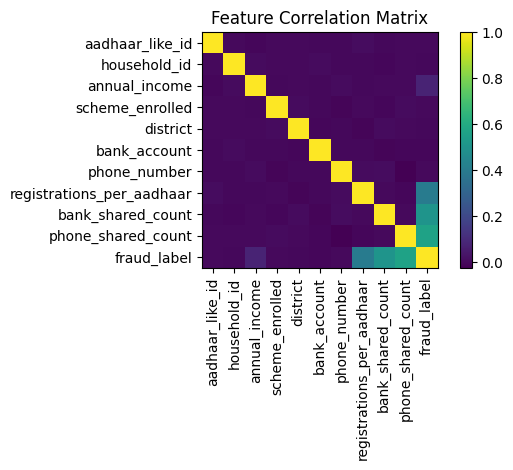

fraud_label                  1.000000
phone_shared_count           0.567254
bank_shared_count            0.507778
registrations_per_aadhaar    0.400361
annual_income                0.079623
aadhaar_like_id              0.001503
phone_number                -0.000107
scheme_enrolled             -0.000135
district                    -0.002273
household_id                -0.003109
bank_account                -0.006076
Name: fraud_label, dtype: float64

In [5]:
corr_matrix = df.corr()

plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

corr_matrix["fraud_label"].sort_values(ascending=False)

### Prepare training features

In [6]:
feature_cols = [
    "annual_income",
    "registrations_per_aadhaar",
    "bank_shared_count",
    "phone_shared_count"
]

X = df[feature_cols]
y_true = df["fraud_label"]

### Train Isolation Forest

In [7]:
model = IsolationForest(
    contamination=0.08,
    random_state=42
)

model.fit(X)

IsolationForest(contamination=0.08, random_state=42)

### Generate anomaly scores & predictions

In [8]:
scores = -model.decision_function(X)
preds = model.predict(X)

pred_labels = (preds == -1).astype(int)

### ROC-AUC evaluation 

In [9]:
roc_auc = roc_auc_score(y_true, scores)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9930738665763341


### Confusion matrix

In [10]:
cm = confusion_matrix(y_true, pred_labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[33490     0]
 [12511  3999]]


### Classification report

In [11]:
report = classification_report(y_true, pred_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84     33490
           1       1.00      0.24      0.39     16510

    accuracy                           0.75     50000
   macro avg       0.86      0.62      0.62     50000
weighted avg       0.82      0.75      0.69     50000



### Anomaly score distribution plot

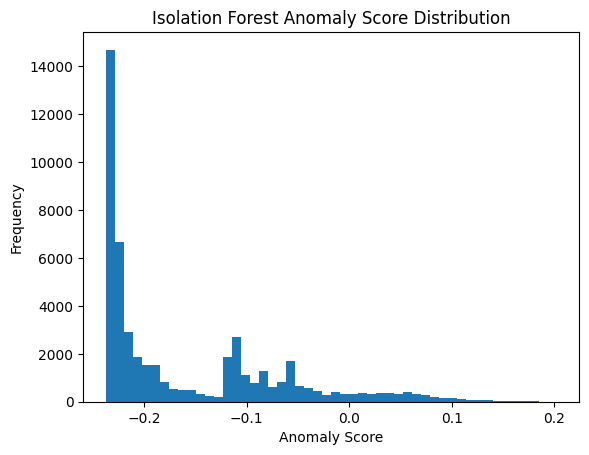

In [12]:
plt.figure()
plt.hist(scores, bins=50)
plt.title("Isolation Forest Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

### Save trained model

In [13]:
joblib.dump(model, "isolation_forest_model.pkl")
print("Model saved successfully")

Model saved successfully


### Save label encoders

In [14]:
joblib.dump(label_encoders, "label_encoders.pkl")
print("Encoders saved successfully")


Encoders saved successfully
